In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import datetime
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import preprocessing as preprocess

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
plt.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(10, 5))

# font_path = 'C:\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf' #한글 폰트 경로 
font_path = 'C:\\Windows\\Fonts\\malgun.ttf' #한글 폰트 경로 

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
""""Directory
bigcon 
  |- data
       |- 01_제공데이터
       |- 02_평가데이터
"""
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'data')
source_dir = os.path.join(cur_dir, 'source')
data_train_dir = os.path.join(data_dir, '01_제공데이터')
data_test_dir = os.path.join(data_dir, '02_평가데이터')


""" Parameters
"""
headline = '2020 빅콘테스트 데이터분석분야-챔피언리그'
train_target = '2019년 실적데이터'
test_target = '2020년 6월 판매실적예측데이터(평가데이터)'
rate_target = '시청률 데이터'


""" Load Data
"""
dfs = preprocess.ProcessSale(
    data_dir = data_dir,
    source_dir = source_dir,
    data_train_dir = data_train_dir,
    data_test_dir = data_test_dir,
    headline = headline,
    train_target = train_target,
    rate_target = rate_target,
    test_target = test_target,
)

df_train = dfs.train_preprocess()
df_test = dfs.test_preprocess()
df_rate = dfs.rate_preprocess()

Train : file already exist!
Test : file already exist!
train data : 38309
test data : 2891


In [3]:
df_train['exposure(min)']=df_train['exposure(min)'].fillna(method='ffill')

In [16]:
test=df_train[['month','day','hour','minute','exposure(min)','mother_cd','temp','humidity','unit_price','sales_cnt']]

In [17]:
index=df_train['product_grp'].unique()
index

array(['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '가구',
       '침구'], dtype=object)

In [21]:
cor=pd.DataFrame()
for i in range(11):
    cor[i]=df_train[df_train.product_grp==index[i]].corr().sales_cnt.sort_values(ascending=False)

In [ ]:
cor.columns=['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '가구',
       '침구']

In [24]:
cor

,의류,속옷,주방,농수축,이미용,가전,생활용품,건강기능,잡화,가구,침구
sales_cnt,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
sell_price,0.698774,0.815402,0.852868,0.860817,0.939988,0.753757,0.664103,0.936983,0.762607,0.852082,0.919644
mother_cd,0.272737,-0.208580,-0.400713,-0.075670,-0.382032,-0.094103,-0.038782,-0.054752,-0.028524,-0.232014,-0.074025
product_cd,0.220852,-0.209755,-0.415345,-0.050313,-0.361013,-0.093359,-0.021079,-0.065879,-0.006665,-0.215268,-0.093755
minute,0.204786,0.248065,0.188084,0.284537,0.181229,0.142498,0.153377,0.218107,0.181272,0.233601,0.375349
pressure,0.104028,0.129884,-0.013322,0.000115,-0.189054,-0.017243,-0.084234,-0.007253,-0.125258,0.065599,0.039504
exposure(min),0.102556,0.123935,0.109708,0.055548,0.154244,-0.049575,-0.053504,-0.073810,-0.326827,-0.124001,-0.040811
temp,0.092151,0.173292,-0.007711,-0.013890,-0.097824,-0.051837,-0.010448,0.027709,-0.122541,0.037494,0.303483
month,0.055470,0.101857,0.091419,0.085860,0.047442,0.148327,-0.171145,0.149018,-0.096815,-0.011300,-0.157254
snowfall,0.046288,-0.037154,0.018195,0.010144,-0.014762,-0.018592,0.027798,0.020105,0.041551,0.089597,NaN


In [20]:
print(len(df_train[df_train.product_grp.isin(['주방','가전','건강기능'])]))
print(len(df_train[df_train.product_grp.isin(['이미용','침구','농수축','생활용품'])]))
print(len(df_train[df_train.product_grp.isin(['가구','속옷','의류'])]))

13873
8735
10873


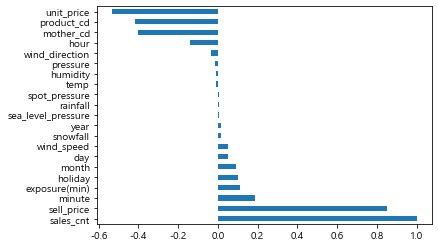

In [53]:
df_train[df_train.product_grp.isin(['주방'])].corr().sales_cnt.sort_values(ascending=False).plot(kind='barh');

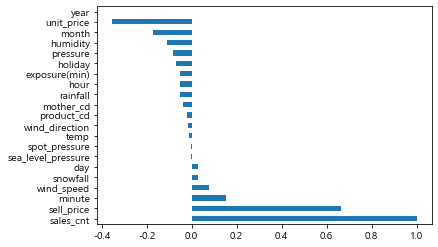

In [57]:
df_train[df_train.product_grp.isin(['생활용품'])].corr().sales_cnt.sort_values(ascending=False).plot(kind='barh');

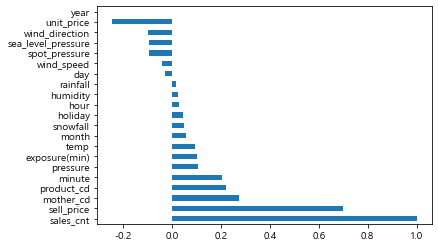

In [54]:
df_train[df_train.product_grp.isin(['의류'])].corr().sales_cnt.sort_values(ascending=False).plot(kind='barh');

In [11]:
#sns.pairplot(cor[['의류','속옷']])

In [28]:
cor=cor[['가구', '가전','농수축', '이미용','생활용품', '주방', '잡화','건강기능', '속옷', '의류', '침구']]

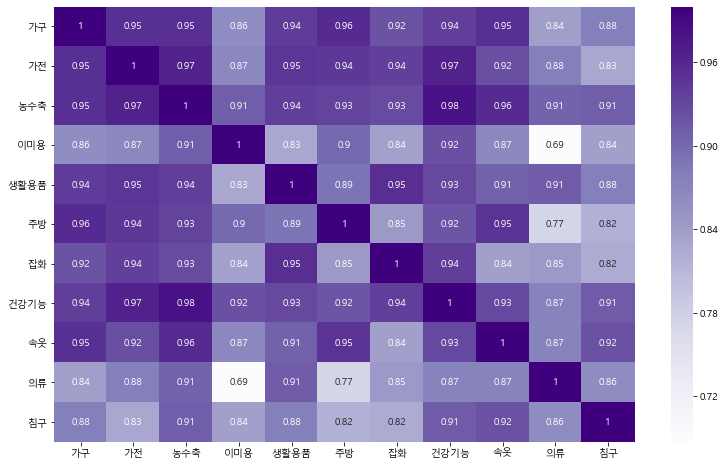

In [65]:
#이건 그냥 상관관계
plt.figure(figsize=(13, 8))
ax = sns.heatmap(cor.corr(), annot=True,cmap='Purples')

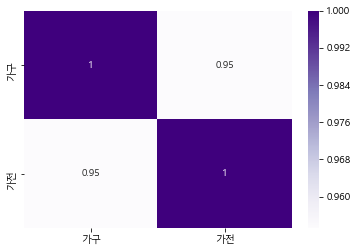

In [66]:
ax1 = sns.heatmap(cor[['가구', '가전']].corr(), annot=True,cmap='Purples')

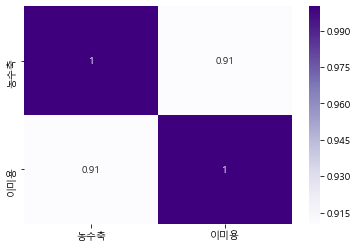

In [67]:
ax2 = sns.heatmap(cor[['농수축', '이미용']].corr(), annot=True,cmap='Purples')

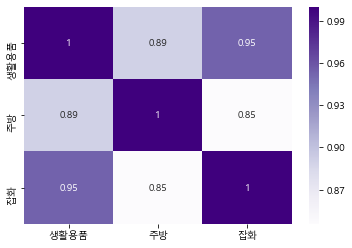

In [68]:
ax3 = sns.heatmap(cor[['생활용품', '주방', '잡화']].corr(), annot=True,cmap='Purples')

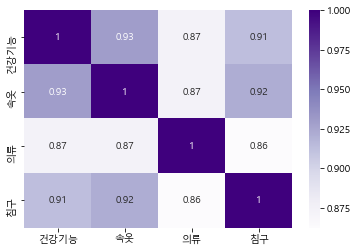

In [69]:
ax4 = sns.heatmap(cor[['건강기능', '속옷', '의류', '침구']].corr(), annot=True ,cmap='Purples')